<a href="https://colab.research.google.com/github/Dekamonia/MachineLearning/blob/main/lab2/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
!pip install pandas
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [5]:
mean = df.groupby(['carbody']).agg({'price': ['mean']})
mean

,price
,mean
carbody,
convertible,21890.500000
hardtop,22208.500000
hatchback,10376.652386
sedan,14344.270833
wagon,12371.960000


In [6]:
median = df.groupby(['carbody']).agg({'price': ['median']})
median

,price
,median
carbody,
convertible,17084.5
hardtop,19687.5
hatchback,8897.0
sedan,10846.5
wagon,11694.0


In [7]:
mode = df.groupby('carbody')['price'].apply(lambda x: x.mode().iloc[0])
mode

carbody
convertible    11595.0
hardtop         8249.0
hatchback       5572.0
sedan           6692.0
wagon           8921.0
Name: price, dtype: float64

In [8]:
min = df.groupby(['carbody']).agg({'price': ['min']})
min

,price
,min
carbody,
convertible,11595.0
hardtop,8249.0
hatchback,5118.0
sedan,5499.0
wagon,6918.0


In [9]:
max = df.groupby(['carbody']).agg({'price': ['max']})
max

,price
,max
carbody,
convertible,37028.0
hardtop,45400.0
hatchback,31400.5
sedan,41315.0
wagon,28248.0


In [10]:
std = df.groupby(['carbody']).agg({'price': [np.std]})
std

,price
,std
carbody,
convertible,11187.802193
hardtop,14555.520749
hatchback,4909.641988
sedan,8470.487812
wagon,5120.948695


Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [11]:
q1 = df.groupby(['carbody'])['price'].quantile(0.25)
q1

carbody
convertible    14246.25
hardtop         9341.50
hatchback       6564.00
sedan           8042.25
wagon           8013.00
Name: price, dtype: float64

In [12]:
q2 = df.groupby(['carbody'])['price'].quantile(0.5)
q2

carbody
convertible    17084.5
hardtop        19687.5
hatchback       8897.0
sedan          10846.5
wagon          11694.0
Name: price, dtype: float64

In [13]:
q3 = df.groupby(['carbody'])['price'].quantile(0.75)
q3

carbody
convertible    30709.25
hardtop        32903.00
hatchback      12730.25
sedan          17770.00
wagon          15750.00
Name: price, dtype: float64

In [14]:
iqr = q3-q1
iqr

carbody
convertible    16463.00
hardtop        23561.50
hatchback       6166.25
sedan           9727.75
wagon           7737.00
Name: price, dtype: float64

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
1. Тип кузова влияет на цену.
Различные типы кузовов имеют разные средние, медианные, минимальные и максимальные цены.
Например, автомобили с кузовом hardtop имеют в среднем более высокую цену по сравнению с другими типами кузовов.
2. Разброс цен в зависимости от типа кузова.
Стандартное отклонение (std) показывает разброс цен внутри каждой категории кузова.
Например, у автомобилей с кузовом convertible разброс цен выше, что может указывать на большую вариативность цен в этой категории.

```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

<Axes: xlabel='price', ylabel='Count'>

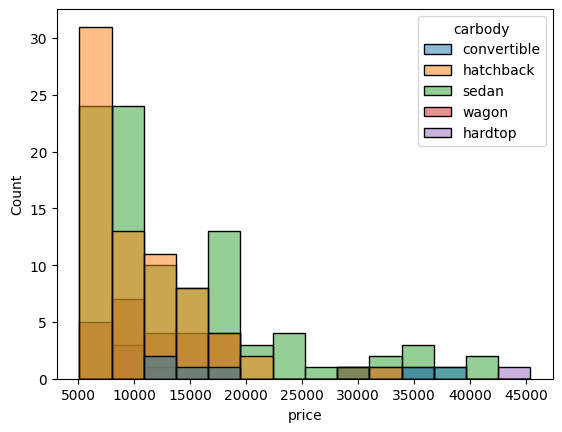

In [15]:
sns.histplot(data=df, x='price', hue='carbody')

На графике гистограммы можно увидеть распределение количества машины относительно их цены и категории кузова к которым они относятся.
Так можно сделать вывод, что самыми доргоими машинами являются те, у которых категория кузова hardtop. Также можно сказать, что машины с типом кузова - hardtop наиболее редкие и встречаются меньше всего.

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

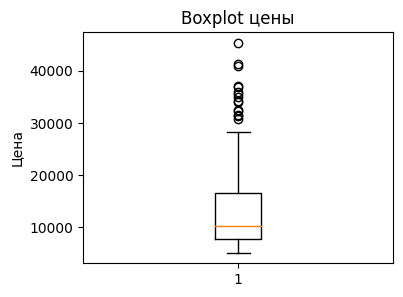

In [16]:
plt.figure(figsize=(4, 3))
plt.boxplot(df['price'])
plt.title('Boxplot цены')
plt.ylabel('Цена')
plt.show()

На данном графике мы видим, что автомибили с ценой более 30.000 являются выбросами по отношению к общему показателю цен на автомобили.

<Axes: xlabel='carbody', ylabel='price'>

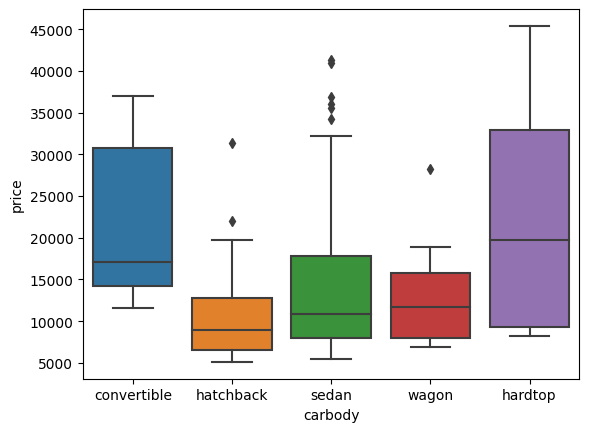

In [17]:
sns.boxplot(x=df["carbody"], y=df["price"])

На данном графике можно увидеть, что для автомобилей категории hatchback представленных в нашем датасете, выбросами будут модели с ценой выше 20.000. Для катаегории sedan с ценой выше 33.000 и для категории wagon выше 28.000

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

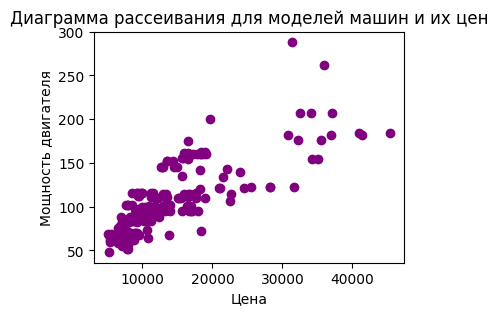

In [18]:
plt.figure(figsize=(4, 3))
plt.scatter(df['price'], df['horsepower'], color='purple')
plt.title('Диаграмма рассеивания для моделей машин и их цен')
plt.xlabel('Цена')
plt.ylabel('Мощность двигателя')
plt.show()

Исходя из представленной диаграмы рассеивания можно сделать вывод, что основная часть автомобилей представленная в датасете находится в ценовом диапозоне до 25.000 и мощностью двигателя до 160 лошадиных сил.

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

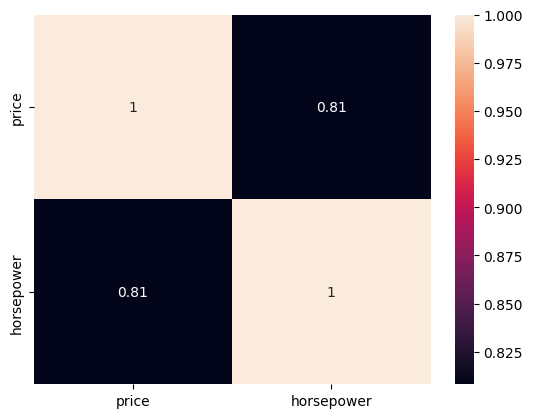

In [19]:
corr_matrix = df[['price', 'horsepower']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Исходя из матрицы корреляции можно сделать вывод, что цена достаточно сильно коррелирует с мощностью двигателя**

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [20]:
"""

Ваш код здесь

"""

'\n\nВаш код здесь\n\n'

### Пример реализации одного метода

In [21]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [22]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]